## **Extração Padrão PI - 5° Semestre**



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importando bibliotecas e o DataFrame gerado pelo Pré-Processamento.

In [ ]:
# IMPORTANDO TODAS AS BIBLIOTECAS IMPORTANTES PARA CÁLCULO E CRIAÇÃO DE VISUALIZAÇÃO GRÁFICA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# IMPORTANDO ARQUIVO
df = pd.read_csv('/content/drive/My Drive/PI - 5 DSM/previsao_doencas.csv')
df.head()

,glucose,cholesterol,hemoglobin,platelets,white_blood_cells,red_blood_cells,hematocrit,mean_corpuscular_volume,mean_corpuscular_hemoglobin,mean_corpuscular_hemoglobin_concentration,...,hba1c,ldl_cholesterol,hdl_cholesterol,alt,ast,heart_rate,creatinine,troponin,c_reactive_protein,disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,2
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,3
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,4
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,1
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,4


### **Informações do DataFrame**

  Neste processo realizamos a listagem de informações relacionadas ao DataFreme, logo o objetivo é realizar uma análise dos dados após o Pré-processamento

In [ ]:
# DIMENSÃO
print(df.shape)

################################################################################

# RESUMO ESTATÍSTICO
print(df.describe())

################################################################################

# DISTRIBUIÇÃO DE CLASSE
print(df.groupby('disease').size())

(2351, 25)
           glucose  cholesterol   hemoglobin    platelets  white_blood_cells  \
count  2351.000000  2351.000000  2351.000000  2351.000000        2351.000000   
mean      0.362828     0.393648     0.586190     0.504027           0.511086   
std       0.251889     0.239449     0.271498     0.303347           0.277270   
min       0.010994     0.012139     0.003021     0.012594           0.010139   
25%       0.129198     0.195818     0.346092     0.200865           0.259467   
50%       0.351722     0.397083     0.609836     0.533962           0.527381   
75%       0.582278     0.582178     0.791215     0.754841           0.743164   
max       0.968460     0.905026     0.983306     0.999393           0.990786   

       red_blood_cells   hematocrit  mean_corpuscular_volume  \
count      2351.000000  2351.000000              2351.000000   
mean          0.506590     0.507152                 0.492200   
std           0.266565     0.285537                 0.275735   
min         

### **Visualização dos dados**

Neste processo geramos os gráficos referente as informações do conjunto de dados

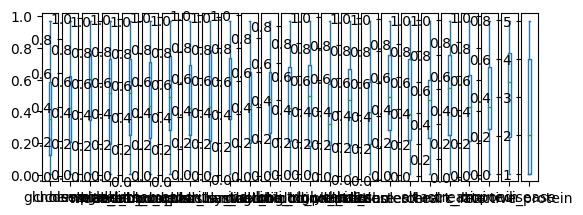

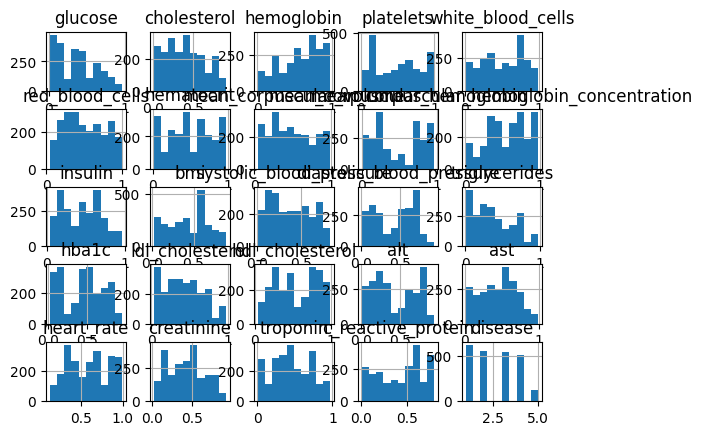

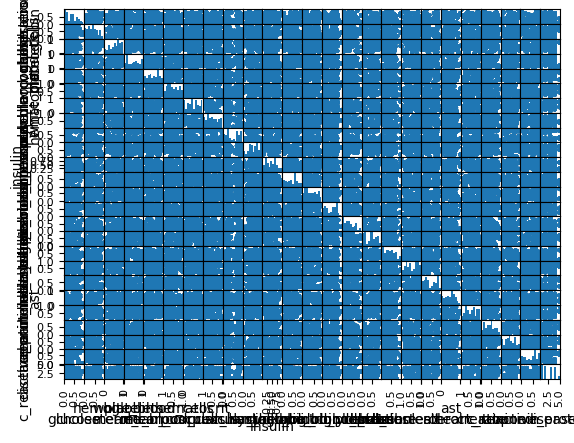

In [ ]:
# GRÁFICO DE BOX AND WHISKER
df.plot(kind='box', subplots=True, layout=(2,25), sharex=False, sharey=False)
plt.show()

################################################################################

# HISTOGRAMA
df.hist()
plt.show()

################################################################################

# GRÁFICO DE DISPERSÃO
scatter_matrix(df)
plt.show()


### **Criar conjunto de validação**

  Após uma análise cuidadosa dos dados do DataFreme, avançamos para a etapa de seleção e preparação do conjunto de validação. Este conjunto, essencial para garantir a precisão e a generalização dos modelos construídos, consiste em uma parcela estratégica dos dados originalmente coletados.

In [ ]:
# CONJUNTO DE VALIDAÇÃO
X = df.drop('disease', axis=1)
Y = df['disease']
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X_train.shape)
print(Y_train.shape)

print(X_validation.shape)
print(Y_validation.shape)


(1880, 24)
(1880,)
(471, 24)
(471,)


In [ ]:
# MÉTRICAS
seed = 7
scoring = 'accuracy'

### Regressão Logística (LR)
### Análise Linear Discriminante (LDA)
### K-vizinhos mais próximos (KNN)
### Árvores de Classificação (Decision Tree) e Regressão (CART)
### Gaussian Naive Bayes (NB)
### Support Vector Machines (SVM)

In [ ]:
# ALGORITMOS
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# AVALIAÇÃO DE CADA MODELO
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
   results.append(cv_results)
   names.append(name)
   msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
   print(msg)

   #print(cv_results)

LR: 0.967021 (0.013830)
LDA: 0.908511 (0.029977)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 0.889362 (0.027823)
SVM: 0.912766 (0.019645)


## **Análise de Algoritmos**

  Nesta etapa crucial, procedemos com a comparação dos algoritmos em relação aos dados do DataFreme, utilizando o gráfico para visualizar suas performances. Cada algoritmo obteve distintos padrões de desempenho no processo de aprendizado. Através da comparação direta, podemos identificar quais algoritmos se destacam em termos de precisão, eficiência computacional e capacidade de generalização. Logo, esta análise serve para orientar na seleção do modelo mais adequado para as necessidades específicas do projeto de previsão de doenças.



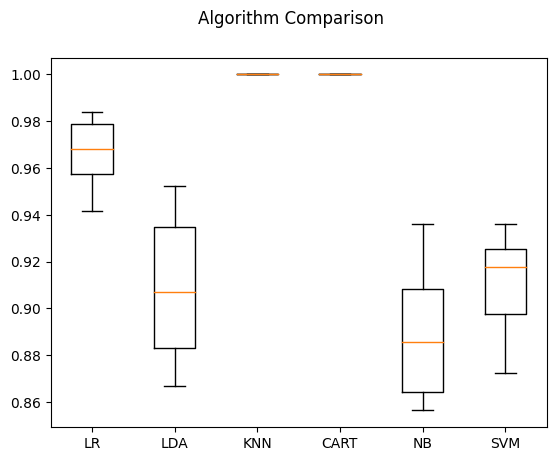

In [ ]:
# COMPARAÇÃO DOS ALGORITMOS
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# MODELO => LR
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))


0.9766454352441614
[[126   0   0   0   0]
 [  0 114   0   0   0]
 [  0   0 110   0   0]
 [  4   0   7  84   0]
 [  0   0   0   0  26]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.98       126
           2       1.00      1.00      1.00       114
           3       0.94      1.00      0.97       110
           4       1.00      0.88      0.94        95
           5       1.00      1.00      1.00        26

    accuracy                           0.98       471
   macro avg       0.98      0.98      0.98       471
weighted avg       0.98      0.98      0.98       471



In [ ]:
# MODELO => LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))


0.9256900212314225
[[126   0   0   0   0]
 [  7 103   0   4   0]
 [  0   0  96   7   7]
 [  0   3   7  85   0]
 [  0   0   0   0  26]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.97       126
           2       0.97      0.90      0.94       114
           3       0.93      0.87      0.90       110
           4       0.89      0.89      0.89        95
           5       0.79      1.00      0.88        26

    accuracy                           0.93       471
   macro avg       0.90      0.93      0.92       471
weighted avg       0.93      0.93      0.93       471



In [ ]:
# MODELO => KNN
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))


1.0
[[126   0   0   0   0]
 [  0 114   0   0   0]
 [  0   0 110   0   0]
 [  0   0   0  95   0]
 [  0   0   0   0  26]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       114
           3       1.00      1.00      1.00       110
           4       1.00      1.00      1.00        95
           5       1.00      1.00      1.00        26

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



In [ ]:
# MODELO => CART
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))

In [ ]:
# MODELO => NB
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)

print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))


0.9171974522292994
[[106  15   0   5   0]
 [  9 105   0   0   0]
 [  0   0 110   0   0]
 [  0   0  10  85   0]
 [  0   0   0   0  26]]
              precision    recall  f1-score   support

           1       0.92      0.84      0.88       126
           2       0.88      0.92      0.90       114
           3       0.92      1.00      0.96       110
           4       0.94      0.89      0.92        95
           5       1.00      1.00      1.00        26

    accuracy                           0.92       471
   macro avg       0.93      0.93      0.93       471
weighted avg       0.92      0.92      0.92       471



In [ ]:
# MODELO => SVM
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print()
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions, zero_division=1))


0.9341825902335457
[[122   0   0   4   0]
 [ 16  94   0   4   0]
 [  0   0 110   0   0]
 [  0   0   7  88   0]
 [  0   0   0   0  26]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92       126
           2       1.00      0.82      0.90       114
           3       0.94      1.00      0.97       110
           4       0.92      0.93      0.92        95
           5       1.00      1.00      1.00        26

    accuracy                           0.93       471
   macro avg       0.95      0.94      0.94       471
weighted avg       0.94      0.93      0.93       471



## **Importando Algoritmo junto ao DataFrame**

  Após uma análise minuciosa dos algoritmos disponíveis, identificamos que o modelo mais eficaz foi o Regressão Logística (LR), alcançando uma taxa de acerto de 97%. Diante desse resultado, decidimos adotá-lo como o algoritmo de aprendizado de máquina para a nossa base de dados. No entanto, os modelos inicialmente apresentaram taxas de acerto acima de 100%, desta forma realizamos ajustes em realção ao pré-processamento, incluindo a remoção de outliers e a omissão da normalização dos dados, o que se revelou crucial para melhorar a performance dos modelos. Essas alterações permitiram uma análise mais precisa e contribuíram significativamente para alcançar um resultado satisfatório.
  Contudo os modelos KNN e CART mantiveram taxas de acerto acima de 100%.


In [ ]:
# EXPORTANDO ARQUIVO DATAFRAME COM ALGORITMO
import joblib
joblib.dump(lr, '/content/drive/MyDrive/PI - 5 DSM/lr.pkl')